In [46]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy 
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import re
import html
from itertools import chain
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
try:
    import seaborn as sns
except:
    !pip install seaborn
%matplotlib inline

In [47]:
training_data = pd.read_csv('income-training.csv')

In [48]:
training_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,42,State-gov,179151,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<50K
1,28,Private,68021,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,30,United-States,<50K
2,24,Private,233499,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,50-100K
3,32,Self-emp-not-inc,168782,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<50K
4,55,Self-emp-not-inc,105582,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,2228,0,50,United-States,<50K


In [49]:
test_data = pd.read_csv('income-testing.csv')

In [50]:
test_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


# 1. Data Cleaning (20%)
###### 1.1) Filling Missing Data

In [51]:
print(training_data.info())
print("\n=======================================\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
Age              24421 non-null int64
WorkClass        23037 non-null object
FinalWeight      24421 non-null int64
Education        24421 non-null object
EducationLvl     24421 non-null int64
MaritalStatus    24421 non-null object
Occupation       23031 non-null object
Relationship     24421 non-null object
Race             24421 non-null object
Sex              24421 non-null object
CapitalGain      24421 non-null int64
CapitalLoss      24421 non-null int64
HoursPerWeek     24421 non-null int64
NativeCountry    24026 non-null object
IncomeBracket    24421 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        11523 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null

In [52]:
training_data.loc[training_data.Age == 0]
training_data.loc[training_data.FinalWeight == 0]
training_data.loc[training_data.EducationLvl == 0]
training_data.loc[training_data.IncomeBracket == 0]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


From above we can see that only three features have null value they are:

<b>WorkClass</b>, <b>Occupation</b> & <b>NativeCountry</b>. 


In [53]:
#Null values for WorkClass
training_data[training_data.WorkClass.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
9,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<50K
29,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States,<50K
95,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
107,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<50K
150,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>100K
154,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
160,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
184,63,NaN,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States,<50K
192,20,NaN,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France,<50K
271,18,NaN,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K


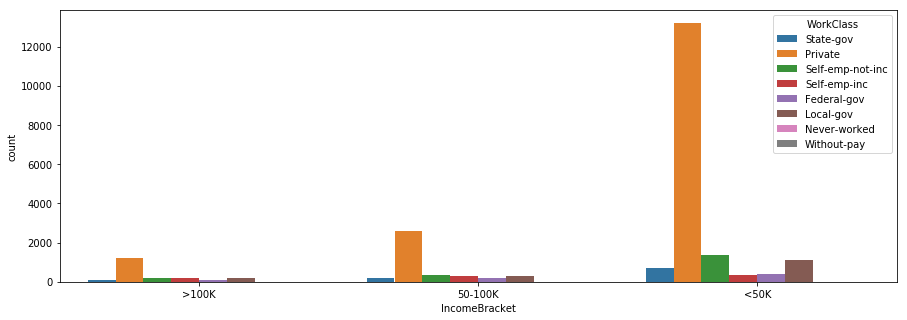

In [54]:
#plot
fig, (axis1) = plt.subplots(1,figsize=(15,5))

#sns.countplot(x='WorkClass', data=training_data, ax=axis1)
sns.countplot(x='IncomeBracket', hue="WorkClass",order = ['>100K', '50-100K', '<50K'], data=training_data, ax=axis1)

# group by embarked, and get the mean for survived passengers for each value in Embarked
#embark_perc = training_data[["WorkClass", "IncomeBracket"]].groupby(['WorkClass'],as_index=False).mean()
#sns.barplot(x='WorkClass', y='IncomeBracket', data=embark_perc,ax=axis3)

In [55]:
#Null values for Occupation
training_data[training_data.Occupation.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
9,65,NaN,137354,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<50K
29,18,NaN,118847,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,24,United-States,<50K
95,63,NaN,321403,9th,5,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
107,49,NaN,227690,HS-grad,9,Divorced,NaN,Not-in-family,White,Female,0,0,40,United-States,<50K
150,31,NaN,26553,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,25,United-States,>100K
154,17,NaN,297117,11th,7,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<50K
160,31,NaN,672412,11th,7,Separated,NaN,Not-in-family,Black,Male,0,0,40,United-States,<50K
184,63,NaN,166425,Some-college,10,Widowed,NaN,Not-in-family,Black,Female,0,0,24,United-States,<50K
192,20,NaN,133515,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,15,France,<50K
271,18,NaN,152641,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<50K


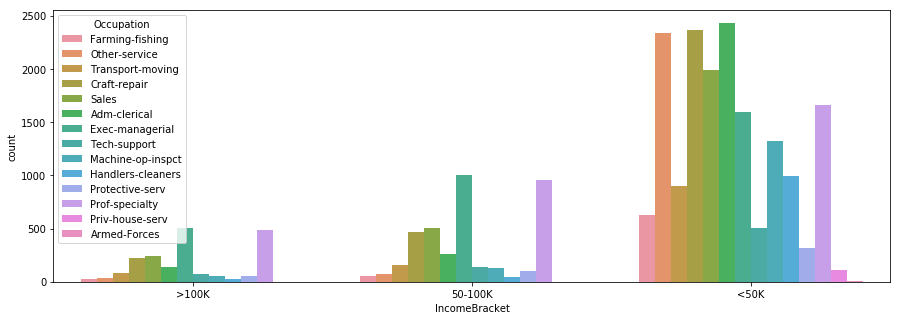

In [56]:
# plot
#sns.factorplot('Embarked','Survived', data=training_data,size=4,aspect=3)

fig, (axis1) = plt.subplots(1,figsize=(15,5))

#sns.countplot(x='Occupation', data=training_data, ax=axis1)
sns.countplot(x='IncomeBracket', hue="Occupation",order = ['>100K', '50-100K', '<50K'], data=training_data, ax=axis1)

# group by embarked, and get the mean for survived passengers for each value in Embarked
#embark_perc = training_data[["WorkClass", "IncomeBracket"]].groupby(['WorkClass'],as_index=False).mean()
#sns.barplot(x='WorkClass', y='IncomeBracket', data=embark_perc,ax=axis3)

In [57]:
#Null values for NativeCountry
training_data[training_data.NativeCountry.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
81,46,Private,268022,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,NaN,50-100K
88,28,Private,226891,Some-college,10,Never-married,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,0,30,NaN,<50K
125,31,Self-emp-not-inc,162551,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,50,NaN,<50K
193,47,Private,263984,Some-college,10,Married-spouse-absent,Exec-managerial,Not-in-family,Black,Male,0,0,40,NaN,<50K
282,39,Self-emp-inc,116358,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,7688,0,40,NaN,50-100K
302,36,Private,177907,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,2176,0,20,NaN,<50K
395,42,Private,153132,Bachelors,13,Divorced,Sales,Unmarried,White,Male,0,0,45,NaN,<50K
400,26,Private,227332,Bachelors,13,Never-married,Transport-moving,Unmarried,Asian-Pac-Islander,Male,0,0,40,NaN,<50K
458,35,Private,77792,HS-grad,9,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0,0,40,NaN,<50K
490,32,Self-emp-not-inc,261056,Bachelors,13,Never-married,Prof-specialty,Own-child,Black,Female,2174,0,60,NaN,<50K


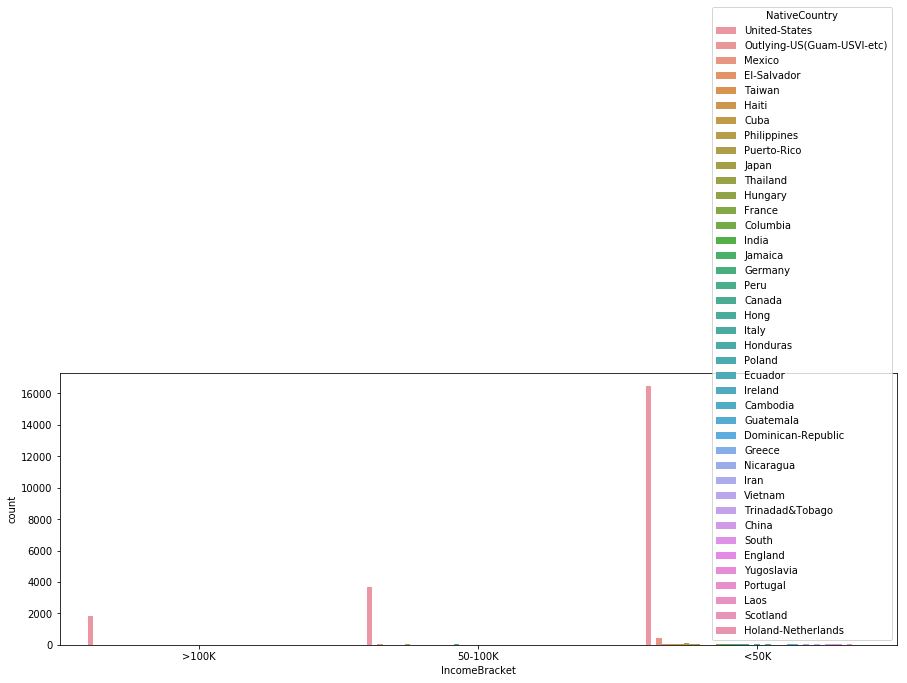

In [58]:
#plot
fig, (axis1) = plt.subplots(1,figsize=(15,5))

#sns.countplot(x='WorkClass', data=training_data, ax=axis1)
sns.countplot(x='IncomeBracket', hue="NativeCountry",order = ['>100K', '50-100K', '<50K'], data=training_data, ax=axis1)

# group by embarked, and get the mean for survived passengers for each value in Embarked
#embark_perc = training_data[["WorkClass", "IncomeBracket"]].groupby(['WorkClass'],as_index=False).mean()
#sns.barplot(x='WorkClass', y='IncomeBracket', data=embark_perc,ax=axis3)

From graphs above, it can be seen the highest counted items for missing features are:

<b>WorkClass</b>: <I>Private</I> (All income range)

<b>Occupation</b>: <I>Adm-clerical</I> (< 50K), Exec-managerial (> 50K)

<b>NativeCountry</b>: <I>United-States</I> (All income range)

Thus, we can filling the missing data as following:

In [59]:
training_data = training_data.set_value(training_data.WorkClass.isnull(), 'WorkClass', 'Private')
test = test_data.set_value(test_data.WorkClass.isnull(), 'WorkClass', 'Private')

In [60]:
training_data[training_data.WorkClass.isnull()]
test_data[test_data.WorkClass.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


In [61]:
training_data = training_data.set_value(training_data.NativeCountry.isnull(), 'NativeCountry', 'United-States')
test_data = test_data.set_value(test_data.NativeCountry.isnull(), 'NativeCountry', 'United-States')

In [62]:
test_data[test_data.NativeCountry.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


In [63]:
training_data = training_data.set_value((training_data.Occupation.isnull())&(training_data.IncomeBracket == '<50K'), 'Occupation', 'Adm-clerical')
test_data = test_data.set_value((test_data.Occupation.isnull())&(test_data.IncomeBracket == '<50K'), 'Occupation', 'Adm-clerical')
training_data = training_data.set_value(training_data.Occupation.isnull(), 'Occupation', 'Exec-managerial')
test_data = test_data.set_value(test_data.Occupation.isnull(), 'Occupation', 'Exec-managerial')

In [64]:
training_data[training_data.Occupation.isnull()]
test_data[test_data.Occupation.isnull()]

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket


In [65]:
print(training_data.info())
print("\n=====================================\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 15 columns):
Age              24421 non-null int64
WorkClass        24421 non-null object
FinalWeight      24421 non-null int64
Education        24421 non-null object
EducationLvl     24421 non-null int64
MaritalStatus    24421 non-null object
Occupation       24421 non-null object
Relationship     24421 non-null object
Race             24421 non-null object
Sex              24421 non-null object
CapitalGain      24421 non-null int64
CapitalLoss      24421 non-null int64
HoursPerWeek     24421 non-null int64
NativeCountry    24421 non-null object
IncomeBracket    24421 non-null object
dtypes: int64(6), object(9)
memory usage: 2.8+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 15 columns):
Age              12211 non-null int64
WorkClass        12211 non-null object
FinalWeight      12211 non-null int64
Education        12211 non-null

From above we can see all missing data has been cleaned

###### 1.2) Cat_Data Num_Data Converting 

I use LabelEncoder from Scikit_Learning for encoding due to its convinence. 

In [66]:
lb_make = LabelEncoder()
training_data["WorkClass_n"] = lb_make.fit_transform(training_data["WorkClass"])
#training_data[["WorkClass", "WorkClass_n"]].head()
training_data["Education_n"] = lb_make.fit_transform(training_data["Education"])
training_data["MaritalStatus_n"] = lb_make.fit_transform(training_data["MaritalStatus"])
training_data["Occupation_n"] = lb_make.fit_transform(training_data["Occupation"])
training_data["Relationship_n"] = lb_make.fit_transform(training_data["Relationship"])
training_data["Race_n"] = lb_make.fit_transform(training_data["Race"])
training_data["Sex_n"] = lb_make.fit_transform(training_data["Sex"])
training_data["NativeCountry_n"] = lb_make.fit_transform(training_data["NativeCountry"])
training_data["IncomeBracket_n"] = lb_make.fit_transform(training_data["IncomeBracket"])

#Dropping categorical features, since we already have their corresponding numerical data.
training_data = training_data.drop(['WorkClass','Education','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry', 'IncomeBracket'], axis=1)

training_data.head()
test_data.head()

,Age,WorkClass,FinalWeight,Education,EducationLvl,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,IncomeBracket
0,57,Self-emp-not-inc,152030,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,25,United-States,50-100K
1,35,Private,341643,Bachelors,13,Never-married,Other-service,Other-relative,White,Male,0,0,50,United-States,<50K
2,26,Private,40915,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,25,United-States,<50K
3,27,Federal-gov,257124,Bachelors,13,Never-married,Transport-moving,Other-relative,White,Male,0,0,35,United-States,<50K
4,21,Private,256278,HS-grad,9,Never-married,Other-service,Other-relative,Other,Female,0,0,35,El-Salvador,<50K


Implement the same function to test data set:

In [67]:
test_data["WorkClass_n"] = lb_make.fit_transform(test_data["WorkClass"])
#training_data[["WorkClass", "WorkClass_n"]].head()
test_data["Education_n"] = lb_make.fit_transform(test_data["Education"])
test_data["MaritalStatus_n"] = lb_make.fit_transform(test_data["MaritalStatus"])
test_data["Occupation_n"] = lb_make.fit_transform(test_data["Occupation"])
test_data["Relationship_n"] = lb_make.fit_transform(test_data["Relationship"])
test_data["Race_n"] = lb_make.fit_transform(test_data["Race"])
test_data["Sex_n"] = lb_make.fit_transform(test_data["Sex"])
test_data["NativeCountry_n"] = lb_make.fit_transform(test_data["NativeCountry"])
test_data["IncomeBracket_n"] = lb_make.fit_transform(test_data["IncomeBracket"])

test_data = test_data.drop(['WorkClass','Education','MaritalStatus','Occupation','Relationship','Race','Sex','NativeCountry', 'IncomeBracket'], axis=1)
test_data.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_n,Education_n,MaritalStatus_n,Occupation_n,Relationship_n,Race_n,Sex_n,NativeCountry_n,IncomeBracket_n
0,57,152030,10,0,0,25,5,15,2,11,5,4,0,37,0
1,35,341643,13,0,0,50,3,9,4,7,2,4,1,37,1
2,26,40915,13,0,0,25,3,9,4,7,1,4,0,37,1
3,27,257124,13,0,0,35,0,9,4,13,2,4,1,37,1
4,21,256278,9,0,0,35,3,11,4,7,2,3,0,7,1


###### IncomeBracket_n = 1 == IncomeBracket =  '< 50K'

###### IncomeBracket_n = 0 == IncomeBracket = '50K - 100K'

###### IncomeBracket_n = 2 == IncomeBracket = '>100K'

# 2. Exporatory Data Analysis (20%)
###### 2.a) Trends in the Data

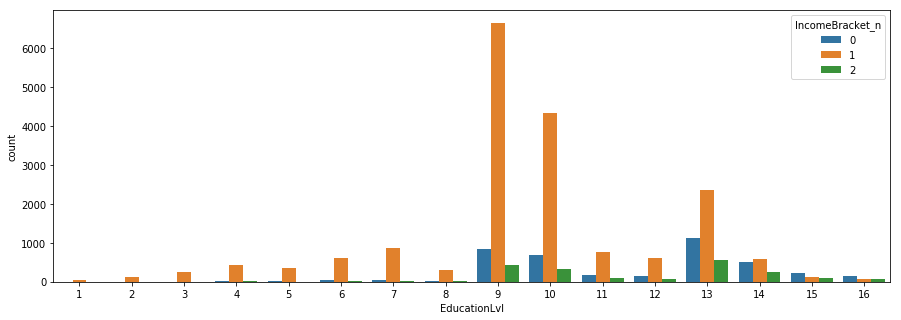

In [68]:
fig, (axis1) = plt.subplots(1,figsize=(15,5))

sns.countplot(x='EducationLvl', hue="IncomeBracket_n", data=training_data, ax=axis1)

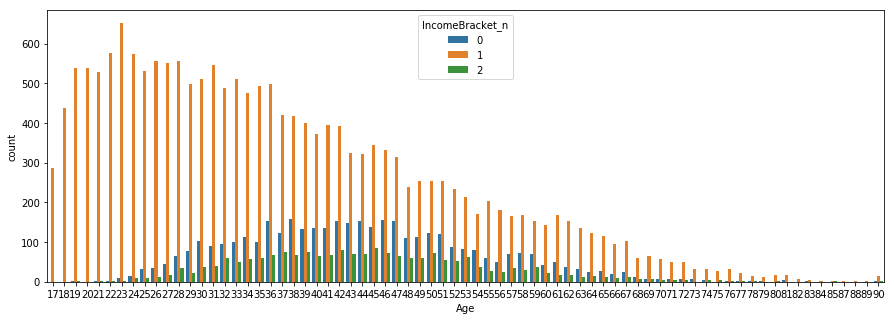

In [69]:
fig, (axis1) = plt.subplots(1,figsize=(15,5))

sns.countplot(x='Age', hue="IncomeBracket_n", data=training_data, ax=axis1)

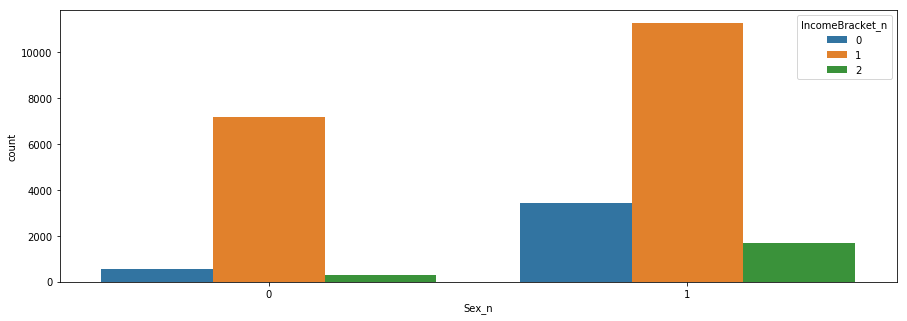

In [70]:
fig, (axis1) = plt.subplots(1,figsize=(15,5))

sns.countplot(x='Sex_n', hue="IncomeBracket_n", data=training_data, ax=axis1)

From these 3 graphs we can conclude as below:

The income bracket are not very related to individual's gender;

People with higher education level's income bracket is much higher;

Most people earn higher income than average when they are middle-old.

###### 2.b) Feature Importance
Random Forest & Extra Tree are used for ploting feature importance.

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

Index(['Age', 'FinalWeight', 'EducationLvl', 'CapitalGain', 'CapitalLoss',
       'HoursPerWeek', 'WorkClass_n', 'Education_n', 'MaritalStatus_n',
       'Occupation_n', 'Relationship_n', 'Race_n', 'Sex_n', 'NativeCountry_n'],
      dtype='object')


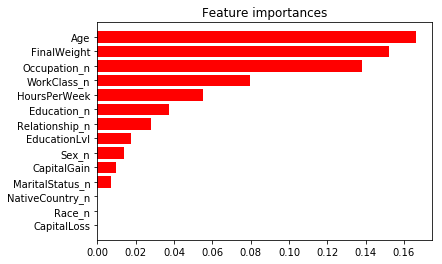

In [72]:
X = training_data.iloc[:,0:14].head()
y = training_data.iloc[:,14].head()

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)
feature_names = X.columns
print (feature_names)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

Index(['Age', 'FinalWeight', 'EducationLvl', 'CapitalGain', 'CapitalLoss',
       'HoursPerWeek', 'WorkClass_n', 'Education_n', 'MaritalStatus_n',
       'Occupation_n', 'Relationship_n', 'Race_n', 'Sex_n', 'NativeCountry_n'],
      dtype='object')


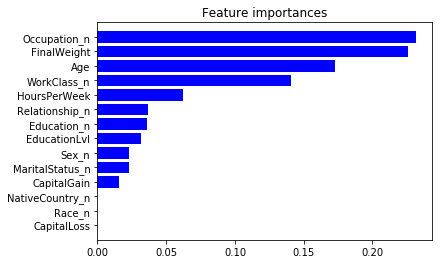

In [73]:
X = training_data.iloc[:,0:14].head()
y = training_data.iloc[:,14].head()

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)
feature_names = X.columns
print (feature_names)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="b", align="center")
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.ylim([-1, X.shape[1]])
plt.show()

From the two graphs above it can be seen with both methode the <b>most important features</b> are: <b>Occupation</b>, <b>FinalWeight</b>, <b>Age</b>, <b>WorkClass</b> & <b>HoursPerWeek</b>. 

Thus these five attributes are most related to an individual's income bracket.

# 3. Feature Selection (10%)

I decided to add feature <b>HumanDevStg</b> as Human Development Stage, which is based on Age. There are 5 types of this feature:

0 (Chidren)  == Age '< 12' 

1 (Teenager) == Age '13 - 18'

2 (Youth) == Age '19 - 39'

3 (Middle-Age) == Age '40 - 60'

4 (Seinor) == Age '> 60'

In [81]:
training_data['HumanDevStg'] = 0
#HumanDevStg_train = training_data
#training_data = pd.concat(HumanDevStg_train)
training_data = training_data.set_value((training_data.Age < 13 ), 'HumanDevStg', 0)
#test_data = test_data.set_value((test_data.Occupation.isnull())&(test_data.IncomeBracket == '<50K'), 'Occupation', 'Adm-clerical')
training_data = training_data.set_value((training_data.Age > 60 ), 'HumanDevStg', 4)
training_data = training_data.set_value((training_data.Age < 61 )&(training_data.Age > 39), 'HumanDevStg', 3)
training_data = training_data.set_value((training_data.Age < 40 )&(training_data.Age > 18), 'HumanDevStg', 2)
training_data = training_data.set_value((training_data.Age < 19 )&(training_data.Age > 12), 'HumanDevStg', 1)

#test_data = test_data.set_value(test_data.Occupation.isnull(), 'Occupation', 'Exec-managerial')

training_data.head()

,Age,FinalWeight,HoursPerWeek,WorkClass_n,Occupation_n,IncomeBracket_n,HumanDevStg
0,42,179151,40,6,4,1,3
1,28,68021,30,3,7,1,2
2,24,233499,40,3,13,0,2
3,32,168782,32,5,2,1,2
4,55,105582,50,5,11,1,3


In [82]:
#Rerrange HumanDevStg from last to the front 
cols = training_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
training_data = training_data[cols]
training_data.head()

,HumanDevStg,Age,FinalWeight,HoursPerWeek,WorkClass_n,Occupation_n,IncomeBracket_n
0,3,42,179151,40,6,4,1
1,2,28,68021,30,3,7,1
2,2,24,233499,40,3,13,0
3,2,32,168782,32,5,2,1
4,3,55,105582,50,5,11,1


Apply the same to test_data

In [75]:
test_data['HumanDevStg'] = 0
#HumanDevStg_train = training_data
#training_data = pd.concat(HumanDevStg_train)
test_data = test_data.set_value((test_data.Age < 13 ), 'HumanDevStg', 0)
#test_data = test_data.set_value((test_data.Occupation.isnull())&(test_data.IncomeBracket == '<50K'), 'Occupation', 'Adm-clerical')
test_data = test_data.set_value((test_data.Age > 60 ), 'HumanDevStg', 4)
test_data = test_data.set_value((test_data.Age < 61 )&(test_data.Age > 39), 'HumanDevStg', 3)
test_data = test_data.set_value((test_data.Age < 40 )&(test_data.Age > 18), 'HumanDevStg', 2)
test_data = test_data.set_value((test_data.Age < 19 )&(test_data.Age > 12), 'HumanDevStg', 1)

#test_data = test_data.set_value(test_data.Occupation.isnull(), 'Occupation', 'Exec-managerial')

test_data.head()

,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_n,Education_n,MaritalStatus_n,Occupation_n,Relationship_n,Race_n,Sex_n,NativeCountry_n,IncomeBracket_n,HumanDevStg
0,57,152030,10,0,0,25,5,15,2,11,5,4,0,37,0,3
1,35,341643,13,0,0,50,3,9,4,7,2,4,1,37,1,2
2,26,40915,13,0,0,25,3,9,4,7,1,4,0,37,1,2
3,27,257124,13,0,0,35,0,9,4,13,2,4,1,37,1,2
4,21,256278,9,0,0,35,3,11,4,7,2,3,0,7,1,2


In [76]:
cols = test_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_data = test_data[cols]
test_data.head()

,HumanDevStg,Age,FinalWeight,EducationLvl,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_n,Education_n,MaritalStatus_n,Occupation_n,Relationship_n,Race_n,Sex_n,NativeCountry_n,IncomeBracket_n
0,3,57,152030,10,0,0,25,5,15,2,11,5,4,0,37,0
1,2,35,341643,13,0,0,50,3,9,4,7,2,4,1,37,1
2,2,26,40915,13,0,0,25,3,9,4,7,1,4,0,37,1
3,2,27,257124,13,0,0,35,0,9,4,13,2,4,1,37,1
4,2,21,256278,9,0,0,35,3,11,4,7,2,3,0,7,1


<b>Feature Engineering</b> is a useful tool to machine learning despite its an informal term, it can help you get most out of your data for predictive modeling. People habe to use feature engineering to create features with domain knowlefge for making machien learning algorithms work. For many machine learning algorithms, people spent most of their efforts in feature engineering. And according to Andrew Ng, "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning" is basically feature engineering.  

<b>Occupation</b>, <b>FinalWeight</b>, <b>Age</b>, <b>WorkClass</b> & <b>HoursPerWeek</b> are seclected as the features set for my machine learning models, because they have the highest feature importance from Q2.b). I also selected the <b>additional feature (HumanDevStg)</b> since is created based on Age.  

Unselected features are dropped as below:

In [77]:
training_data.drop(labels=['EducationLvl', 'CapitalGain', 'CapitalLoss', 'Education_n', 'MaritalStatus_n', 'Relationship_n', 'Race_n','Sex_n','NativeCountry_n'], axis=1, inplace=True)
test_data.drop(labels=['EducationLvl', 'CapitalGain', 'CapitalLoss', 'Education_n', 'MaritalStatus_n', 'Relationship_n', 'Race_n','Sex_n','NativeCountry_n'], axis=1, inplace=True)

In [83]:
training_data.head()

,HumanDevStg,Age,FinalWeight,HoursPerWeek,WorkClass_n,Occupation_n,IncomeBracket_n
0,3,42,179151,40,6,4,1
1,2,28,68021,30,3,7,1
2,2,24,233499,40,3,13,0
3,2,32,168782,32,5,2,1
4,3,55,105582,50,5,11,1


In [80]:
test_data.head()

,HumanDevStg,Age,FinalWeight,HoursPerWeek,WorkClass_n,Occupation_n,IncomeBracket_n
0,3,57,152030,25,5,11,0
1,2,35,341643,50,3,7,1
2,2,26,40915,25,3,7,1
3,2,27,257124,35,0,13,1
4,2,21,256278,35,3,7,1


# 4. Model Implementation (25%)

In [110]:
#Import some machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve

In [85]:
X = training_data.drop(['IncomeBracket_n'], axis=1)
y = training_data.IncomeBracket_n
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

###### Defining the function of Kfold cross-validation 

In [92]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    
    #run KFold with 10 folds instead of the default 3
    #on the 24421 records in the training_data
    kf = KFold(24421, n_folds=10)
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

#### Classifier 1: Random Forest

In [115]:
rfc = RandomForestClassifier()#(n_estimators=250)

#acc_scorer = make_scorer(accuracy_score)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<b>Accuracy</b> of Randome Forest Classifier <b>(rfc)</b> with k-fold:

In [116]:
run_kfold(rfc)

Fold 1 accuracy: 0.7106017191977078
Fold 2 accuracy: 0.7055692055692055
Fold 3 accuracy: 0.717035217035217
Fold 4 accuracy: 0.7231777231777232
Fold 5 accuracy: 0.7301392301392301
Fold 6 accuracy: 0.717035217035217
Fold 7 accuracy: 0.7199017199017199
Fold 8 accuracy: 0.7207207207207207
Fold 9 accuracy: 0.7178542178542179
Fold 10 accuracy: 0.7104832104832105
Mean Accuracy: 0.717251818111417


#### Classifier 2: Logistic Regression

In [113]:
lg = LogisticRegression()#(random_state=42, penalty='l1')
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<b>Accuracy</b> of Logistic Regression <b>(jg)</b> with k-fold:

In [117]:
run_kfold(lg)

Fold 1 accuracy: 0.760130986492018
Fold 2 accuracy: 0.7440622440622441
Fold 3 accuracy: 0.7457002457002457
Fold 4 accuracy: 0.7674037674037674
Fold 5 accuracy: 0.7686322686322686
Fold 6 accuracy: 0.7534807534807535
Fold 7 accuracy: 0.7555282555282555
Fold 8 accuracy: 0.7485667485667485
Fold 9 accuracy: 0.7559377559377559
Fold 10 accuracy: 0.7485667485667485
Mean Accuracy: 0.7548009774370806


#### Classifier 3: Decision Tree

In [118]:
dt = DecisionTreeClassifier()#(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<b>Accuracy</b> of Decision Tree Classifier <b>(dt)</b> with k-fold:

In [121]:
run_kfold(dt)

Fold 1 accuracy: 0.6643471142038477
Fold 2 accuracy: 0.6597051597051597
Fold 3 accuracy: 0.6826371826371826
Fold 4 accuracy: 0.671990171990172
Fold 5 accuracy: 0.6875511875511876
Fold 6 accuracy: 0.6764946764946765
Fold 7 accuracy: 0.6715806715806716
Fold 8 accuracy: 0.6777231777231777
Fold 9 accuracy: 0.6654381654381655
Fold 10 accuracy: 0.6531531531531531
Mean Accuracy: 0.6710620660477394


#### Classifier 4: SVM

In [122]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<b>Accuracy</b> of SVM <b>(svm_clf)</b> with k-fold:

In [123]:
run_kfold(svm_clf)

Fold 1 accuracy: 0.7589029881293492
Fold 2 accuracy: 0.7440622440622441
Fold 3 accuracy: 0.7440622440622441
Fold 4 accuracy: 0.7665847665847666
Fold 5 accuracy: 0.7686322686322686
Fold 6 accuracy: 0.7522522522522522
Fold 7 accuracy: 0.7559377559377559
Fold 8 accuracy: 0.7485667485667485
Fold 9 accuracy: 0.7551187551187551
Fold 10 accuracy: 0.7493857493857494
Mean Accuracy: 0.7543505772732134


Accuracy for each models are shown as above. With these four classfication algorithms, a conclusion can be made as Logistic Regression has the best performance. It can be seen that Logistic Regression model has the highest accuracy of all these four models. SVM model has the comparable high accuracy, but Logistic Regress model takes less time thank SVM. That's why I would say Logistic Regression model performs best. 

###### Briefly explanation for these four algorithms.
<b>1. Random Forest:</b> An ensemble learning method for classificaiton, it creates multiple decision trees at training time and outputting the class that is the mode of classes for classificaiton.

    Probs: High accuracy; Can be applied for missing data;
           Runs on large set with high efficiency;

    Cons: Overfit for some dataset with noisy classificaiton tasks;
          Difficult for human to interpret; 

<b>2. Logistic Regression:</b> Analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable.

    Probs: Convenient probability scores for obsercations;
           Efficient implementations; 

    Cons: Weak on large feature space;
          Cannot handle large number of categorical features well;
          Relies on transformations for non-linear features;

<b>3. Decision Tree:</b> Creating a training model witch can use to predict class or value of target variables by learning devision rules inferred from training data.

    Probs: Can be applied for non-linear feature;
           Intuitive decision rules;

    Cons: No ranking scores as rirect result;
          Highly biased to training set;

<b>4. SVM:</b> Use kernel trick to transform data then finds an optimal boundary between the possible outputs based on these transformations.

    Probs: Comfortable with large feature space;
           Handle non-lienar feature interactions; 
           Not rely on entire data;

    Cons: Time consuming with large number of observations;
          Hard to find appropriate kernel; 
   
   


# 5. Model Tuning (20%)

In [161]:
lg_b = LogisticRegression(random_state=42, penalty='l1')
C_range = np.logspace(-4, 3, 8)
parameters = dict(C = C_range)

# Use classification accuracy to compare parameter combinations
acc_scorer_lg = make_scorer(accuracy_score)
# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg = GridSearchCV(lg_b, param_grid=parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

# Set our classifier, lg, to have the best combination of parameters
lg_b = grid_obj_lg.best_estimator_

# Fit the selected classifier to the training data. 
lg_b.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [162]:
predictions_lg = lg_b.predict(X_test)
print(accuracy_score(y_test, predictions_lg))
print('Best C:',lg_b) 

0.757745325508
Best C: LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


C = 0.0001 is used, because at this situation our model has the highest accuracy. 

# 6. Testing (5%)

In [165]:
test_income = test_data['IncomeBracket_n']
predictions = lg_b.predict(test_data.drop('IncomeBracket_n', axis=1))

output = pd.DataFrame({'IncomeBracket_n':test_income,'Prediction': predictions })
test_scores = metrics.accuracy_score(test_data.IncomeBracket_n, predictions) 
print(test_scores)
output.head()

0.748751126034


,IncomeBracket_n,Prediction
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1


My model performs better on training_data(0.7577) then test_data(0.7487). 